# Step 1 - Import all the libraries that you be needed

In [1]:
import networkx as nx
import re
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Step 2 - Identify the markings and dead markings of the model

The following procedures are done defines patterns ("pat") to be found in the file.

In [2]:
markings = []
dead_markings = []
pat1 = re.compile(": play_1_smove {play")  
pat2 = re.compile(": play_1_sdone {play") 

First, set the path of the info.txt file.

In [3]:
with open ("C:\\Users\\Acer\\Google Drive\\UFSC\\Dissertação\\Fiacre Exemplos\\exemplos atuais\\Intersection1 - 4 CAVs B\\info.txt", 'rt') as info:    
     for t in info: 
        # If a pattern 'pat1 is found, the item is defined as a marking (state)
        if pat1.search(t) != None :
            # the markings are broken into lines 
            # (rstrip command) and added to the marking list.
            markings.append((t.rstrip('\n')))
            

        else:  # If a pattern 'pat2' is found, the item is defined as 
               # a dead marking, and also added to markings list
            if pat2.search(t) != None:
                markings.append((t.rstrip('\n')))
                dead_markings.append((t.rstrip('\n')))
                print("Final state found")


Final state found


"maux" and "maux2" handle each line in markings List and extracts only the arrays.

"st" will store all the arrays generated by the model

In [4]:
maux  = [re.sub(r'.*va=', '', iline) for iline in markings]
maux2 = [re.sub(r'}', '', iline2) for iline2 in maux]

st =[]

This FOR loop transforms array strings into np.array

In [5]:
for l in maux2:
    maux3 = np.array(ast.literal_eval(l))
    st.append(maux3)

In [6]:
st

[array([[1, 1, 0, 0, 0, 4, 1, 1],
        [1, 1, 2, 0, 0, 0, 1, 1],
        [0, 3, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 1]]), array([[1, 1, 0, 0, 0, 4, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [0, 3, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 1]]), array([[1, 1, 0, 0, 0, 4, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [0, 3, 2, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 1]]), array([[1, 1, 0, 0, 0, 4, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [0, 0, 3, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 0, 0],
        [0,

This removes the unnecessary information from the dead markings and transforms each one into a list item. "target" stores the dead marking (desired final state) of the system

In [7]:
daux  = [re.sub(r' :.*', '', iline) for iline in dead_markings]
target = daux[0]


In [8]:
target

'35956'

# Step 3 -  Extract the information about the states and transitions of the Reachability Graph

It reads the .txt file from the .ktz file:

In [9]:
reach_file = open("C:\\Users\\Acer\\Google Drive\\UFSC\\Dissertação\\Fiacre Exemplos\\exemplos atuais\\Intersection1 - 4 CAVs B\\reach_graph.txt", 'r')
reach_list = [line.strip().split(' ') for line in reach_file.readlines()]
first=reach_list[0] # this stores state and transition information in the first line
# first = des(initial state, number of transitions, number of states)


In [10]:
first

['des(0,108161,37365)']

In [11]:
reach_list.pop(0) # delete the first line of the file now that the information is stored
upd_reach_list=[] # list to update transition values

This procedure treats the string "first" and selects the number of states

In [12]:
states=str(first);
states_1 = states.translate({ord(i): None for i in '[(des)]'})
states_2 = states_1.translate({ord(i): None for i in "'"})
states_3 = states_2.split(',')
states_3.pop(0)
states_3.pop(0)
n_states= int(states_3[0]) # stores total number of states

In [13]:
print("The number of states is: " + str(n_states))

The number of states is: 37365


This action selects transitions to be read

In [14]:
for row in reach_list:

       line=str(row); 
       line_up = line.translate({ord(i): None for i in '[(play_t)"]'})
       line_aux =  line_up.translate({ord(i): None for i in "'"})
       line_up2 = line_aux.split(',')
       line_up2.pop(1)
       upd_reach_list.append(line_up2)

# Step 4 - Start the composition of reachability graph

In [15]:
lst = range(n_states) 
nodes = ["{:1d}".format(x) for x in lst] # stores all the states Id 

In [16]:
nodes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

Start the networkX library

In [17]:
G = nx.Graph()
# add the nodes of the graph from "nodes" list. nodes are the states
G.add_nodes_from(nodes)
# add the edges of the graph from "upd_reach_list" list. edges are the transitions
G.add_edges_from(upd_reach_list) 

print("Number of Nodes: "+ str(G.number_of_nodes()))
print("Number of Edges: "+ str(G.number_of_edges()))
print(" ")

Number of Nodes: 37365
Number of Edges: 108161
 


# Step 5 - Make the animations

NOTE: Jupyter is unable to generate all inline animations as it causes memory error because there are too many animations.
So, the following procedure only generate one example of an animated shortest path.

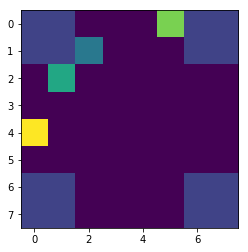

In [18]:
# Stores the states that make up the shortest path in a list
shortest_path = nx.shortest_path(G, '0', target) 
shortest_path.pop(0)
# Add the initial state from the System to a vector that will be updated
image_vector = st[0] 
    
for k in shortest_path:
    s_index = nodes.index(k)
    image_vector = np.vstack((image_vector,st[s_index]))

b=np.split(image_vector, len(shortest_path)+1)

#transforms each state / transition into image
 
fig, ax = plt.subplots()

frame = 0
matrice = ax.imshow(b[0])
    
def update(i):
    value=b[i]
    matrice.set_array(value)
    
ani = animation.FuncAnimation(fig, update, len(b))

In [19]:
HTML(ani.to_html5_video())

In [20]:
shortest_path

['1',
 '3',
 '7',
 '15',
 '39',
 '81',
 '141',
 '222',
 '313',
 '466',
 '688',
 '982',
 '1279',
 '1627',
 '2076',
 '2611',
 '3215',
 '3967',
 '5664',
 '7976',
 '11030',
 '14351',
 '18175',
 '23509',
 '28908',
 '33124',
 '35956']